# **Lab 9**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/content/startup_growth_investment_data.csv")

In [3]:
df

,Startup Name,Industry,Funding Rounds,Investment Amount (USD),Valuation (USD),Number of Investors,Country,Year Founded,Growth Rate (%)
0,Startup_1,Blockchain,8,1.335166e+09,6.621448e+09,50,Germany,2012,77.10
1,Startup_2,SaaS,2,2.781498e+09,8.363214e+09,36,UK,2006,105.52
2,Startup_3,EdTech,10,3.309032e+09,1.548270e+10,39,Singapore,2016,190.47
3,Startup_4,Fintech,5,4.050196e+09,1.268253e+10,44,France,2021,9.44
4,Startup_5,EdTech,9,1.645080e+09,6.887966e+09,48,India,2011,192.00
...,...,...,...,...,...,...,...,...,...
4995,Startup_4996,EdTech,5,4.015771e+09,1.212346e+10,29,Germany,2002,64.08
4996,Startup_4997,AI,2,3.619535e+09,1.107936e+10,14,Brazil,2000,151.29
4997,Startup_4998,SaaS,10,4.257640e+08,8.277586e+08,29,UK,2018,140.43
4998,Startup_4999,SaaS,4,4.220592e+08,1.895497e+09,6,India,2017,122.93


In [4]:
X = df.iloc[:, [3,4]].values

In [5]:
X

array([[1.33516585e+09, 6.62144804e+09],
       [2.78149822e+09, 8.36321410e+09],
       [3.30903193e+09, 1.54826974e+10],
       ...,
       [4.25763990e+08, 8.27758556e+08],
       [4.22059213e+08, 1.89549747e+09],
       [1.20876660e+09, 2.26563520e+09]])

In [6]:
from sklearn.cluster import KMeans

[1.6022768535312418e+23]
[1.6022768535312418e+23, 5.137808512092025e+22]
[1.6022768535312418e+23, 5.137808512092025e+22, 2.4919448057419986e+22]
[1.6022768535312418e+23, 5.137808512092025e+22, 2.4919448057419986e+22, 1.503454675350848e+22]
[1.6022768535312418e+23, 5.137808512092025e+22, 2.4919448057419986e+22, 1.503454675350848e+22, 1.0714820719748227e+22]
[1.6022768535312418e+23, 5.137808512092025e+22, 2.4919448057419986e+22, 1.503454675350848e+22, 1.0714820719748227e+22, 7.870810681839852e+21]
[1.6022768535312418e+23, 5.137808512092025e+22, 2.4919448057419986e+22, 1.503454675350848e+22, 1.0714820719748227e+22, 7.870810681839852e+21, 6.27838465073123e+21]
[1.6022768535312418e+23, 5.137808512092025e+22, 2.4919448057419986e+22, 1.503454675350848e+22, 1.0714820719748227e+22, 7.870810681839852e+21, 6.27838465073123e+21, 5.277895658784944e+21]
[1.6022768535312418e+23, 5.137808512092025e+22, 2.4919448057419986e+22, 1.503454675350848e+22, 1.0714820719748227e+22, 7.870810681839852e+21, 6.2783

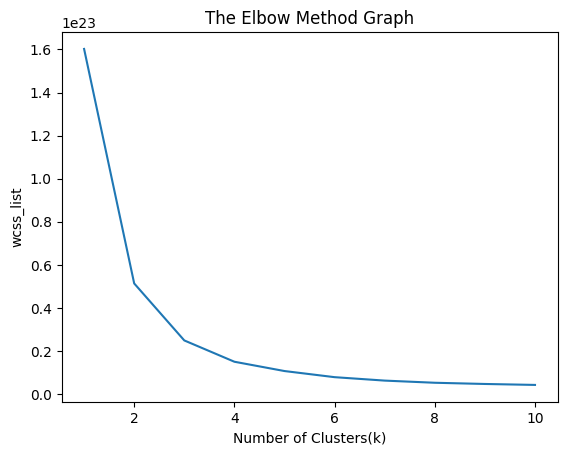

In [7]:
wcss_list=[]

for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state=42)
  kmeans.fit(X)
  wcss_list.append(kmeans.inertia_)
  print(wcss_list)

plt.plot(range(1,11), wcss_list)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('wcss_list')
plt.show()

In [8]:
kmeans = KMeans(n_clusters=7, init='k-means++', random_state=42)
y_predict = kmeans.fit_predict(X)

In [9]:
y_predict

array([3, 3, 6, ..., 5, 5, 5], dtype=int32)

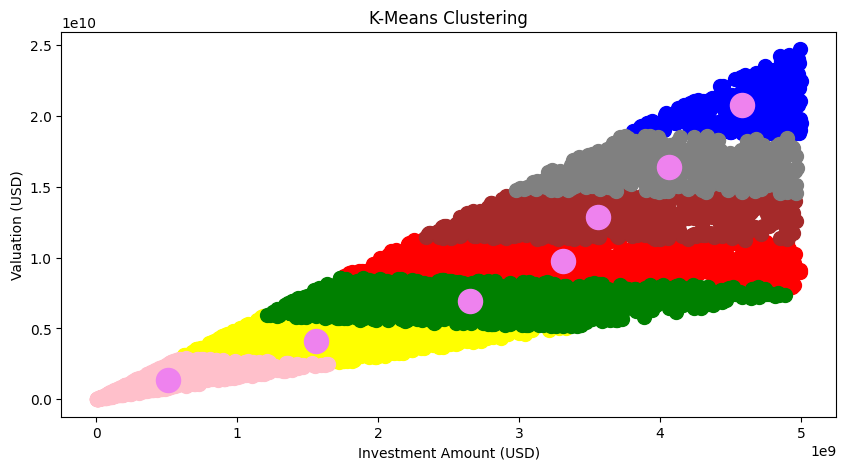

In [13]:
plt.figure(figsize=(10,5))
plt.scatter(X[y_predict == 0, 0], X[y_predict == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_predict == 1, 0], X[y_predict == 1, 1], s=100, c='yellow', label='Cluster 2')
plt.scatter(X[y_predict == 2, 0], X[y_predict == 2, 1], s=100, c='blue', label='Cluster 3')
plt.scatter(X[y_predict == 3, 0], X[y_predict == 3, 1], s=100, c='green', label='Cluster 4')
plt.scatter(X[y_predict == 4, 0], X[y_predict == 4, 1], s=100, c='brown', label='Cluster 5')
plt.scatter(X[y_predict == 5, 0], X[y_predict == 5, 1], s=100, c='pink', label='Cluster 6')
plt.scatter(X[y_predict == 6, 0], X[y_predict == 6, 1], s=100, c='grey', label='Cluster 7')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s= 300, c = 'violet', label = 'Centroid')
plt.title('K-Means Clustering')
plt.xlabel('Investment Amount (USD)')
plt.ylabel('Valuation (USD)')
plt.show()

In [14]:
from sklearn.metrics import silhouette_score

In [15]:
silhouette_avg = silhouette_score(X, y_predict)
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.46
